In [7]:
from Bio.PDB import PDBParser
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

### Bloque 7 – Mapa de distancias internas Cα–Cα

En este bloque se analiza la organización espacial de la proteína generando un mapa de distancias internas
entre todos los átomos Cα del modelo de AlphaFold. Para ello, se extraen las coordenadas 3D de cada Cα y se
construye una matriz dist[i, j] que contiene la distancia entre los residuos i y j.

Este mapa de calor permite identificar regiones compactas (distancias pequeñas y patrón denso) y regiones
más extendidas o flexibles (distancias mayores y zonas más difusas). Finalmente, se relaciona este patrón
estructural con la confianza del modelo (pLDDT).

Primero se carga el archivo PDB de AlphaFold y se extraen, en orden, los residuos que contienen un átomo Cα.
Para cada residuo se almacenan sus coordenadas tridimensionales. Esto permite trabajar con una lista ordenada
de posiciones (una por residuo) para calcular el mapa de distancias.


In [2]:
pdb_path = "data/AF-P61769-F1-model_v6.pdb"

parser = PDBParser(QUIET=True)
structure = parser.get_structure("B2M_AF", pdb_path)

chain = list(structure[0].get_chains())[0]

ca_coords = []
res_indices = []   
res_keys = []      

for residue in chain:
    if residue.id[0] != " ":
        continue
    if "CA" not in residue:
        continue

    resseq = residue.id[1]
    ca = residue["CA"].get_coord()

    ca_coords.append(ca)
    res_indices.append(resseq)
    res_keys.append((chain.id, resseq))

ca_coords = np.array(ca_coords)

print("Número de Cα extraídos:", len(ca_coords))
print("Primeros residuos:", res_indices[:10])

Número de Cα extraídos: 119
Primeros residuos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


A continuación se calcula la matriz de distancias Cα–Cα. Cada entrada dist[i, j] representa la distancia
euclídea entre el Cα del residuo i y el Cα del residuo j. La matriz resultante es simétrica y su diagonal
es cero.

In [3]:
diff = ca_coords[:, None, :] - ca_coords[None, :, :]
dist_matrix = np.sqrt(np.sum(diff**2, axis=-1))

print("Matriz de distancias:", dist_matrix.shape)
print("Distancia mínima (no diagonal):", np.min(dist_matrix[np.nonzero(dist_matrix)]))
print("Distancia máxima:", np.max(dist_matrix))


Matriz de distancias: (119, 119)
Distancia mínima (no diagonal): 3.0748982
Distancia máxima: 76.10871


Se representa la matriz de distancias como un mapa de calor. Los valores bajos indican residuos cercanos en el
espacio (regiones compactas), mientras que los valores altos corresponden a residuos alejados (regiones extendidas).

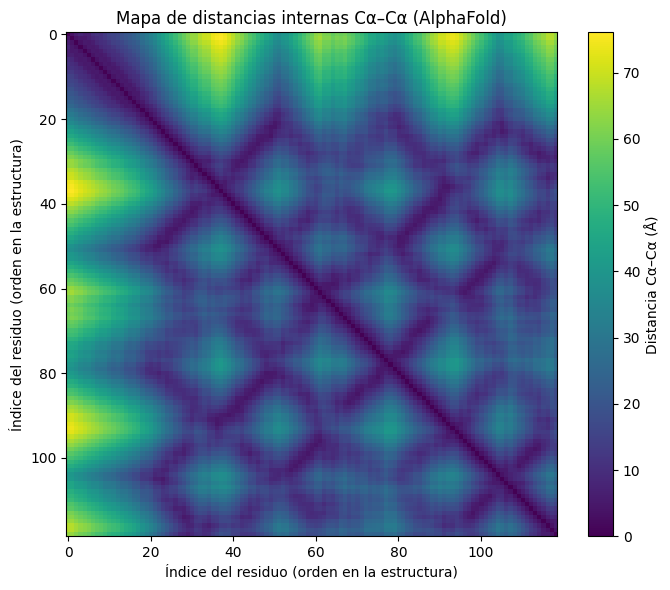

In [5]:
plt.figure(figsize=(7, 6))
plt.imshow(dist_matrix, aspect="auto")
plt.colorbar(label="Distancia Cα–Cα (Å)")
plt.title("Mapa de distancias internas Cα–Cα (AlphaFold)")
plt.xlabel("Índice del residuo (orden en la estructura)")
plt.ylabel("Índice del residuo (orden en la estructura)")
plt.tight_layout()
plt.show()